# 2D Histograms in physt

In [1]:
# Necessary import evil
import physt
from physt import histogram2d, histogramdd, histogram
import numpy as np
import matplotlib.pyplot as plt
import seaborn.apionly as sns
%matplotlib inline

/home/pipek/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
x = np.random.normal(100, 1, 1000)
y = np.random.normal(10, 10, 1000)

In [3]:
h2 = histogram2d(x, y, [8, 4], name="Some histogram", axis_names=["x", "y"])
h2

Histogram2D(bins=(8, 4), total=1000.0)

In [4]:
h2.frequencies

array([[   0.,    3.,    9.,    0.],
       [   0.,    8.,   25.,    6.],
       [   0.,   30.,   95.,   22.],
       [   1.,   63.,  176.,   37.],
       [   2.,   57.,  150.,   52.],
       [   0.,   40.,  111.,   29.],
       [   2.,   16.,   44.,    6.],
       [   0.,    3.,   11.,    2.]])

## Multidimensional binning

In [5]:
h3 = histogram2d(x, y, "fixed_width", (2, 5), name="Some histogram", axis_names=["x", "y"])
h3.bins

[array([[  96.,   98.],
        [  98.,  100.],
        [ 100.,  102.],
        [ 102.,  104.]]), array([[-35., -30.],
        [-30., -25.],
        [-25., -20.],
        [-20., -15.],
        [-15., -10.],
        [-10.,  -5.],
        [ -5.,   0.],
        [  0.,   5.],
        [  5.,  10.],
        [ 10.,  15.],
        [ 15.,  20.],
        [ 20.,  25.],
        [ 25.,  30.],
        [ 30.,  35.],
        [ 35.,  40.]])]

[array([[  97.02507102,   99.54400422],
        [  99.54400422,  100.40455586],
        [ 100.40455586,  102.75733053]]), array([[-32.60836762,   5.46543197],
        [  5.46543197,  14.37627807],
        [ 14.37627807,  37.80879861]])]

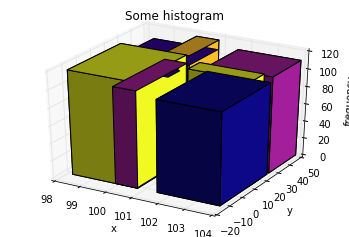

In [6]:
h4 = histogram2d(x, y, "quantile", 3, name="Some histogram", axis_names=["x", "y"])
h4.plot()   # Not nice in matplotlib :-()
h4.bins

## Plotting

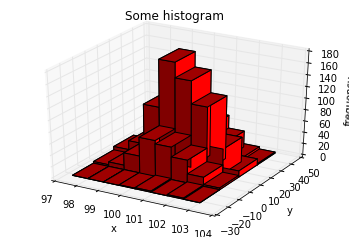

In [7]:
ax = h2.plot(color="r")

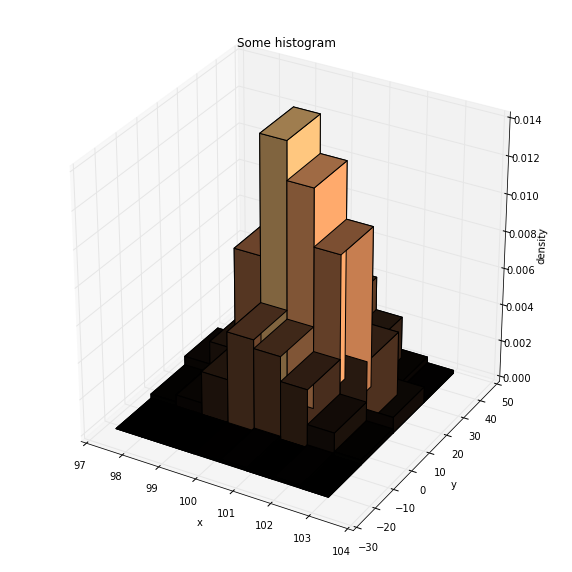

In [8]:
import matplotlib.cm as cm

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax = h2.plot(ax=ax, cmap=cm.copper, density=True)

## Projections

/home/pipek/code/physt/physt/histogram1d.py:291: UserWarning: Deprecation: use bin_sizes instead of bin_widths.
  warnings.warn("Deprecation: use bin_sizes instead of bin_widths.")


Histogram1D(bins=8, total=1000.0)

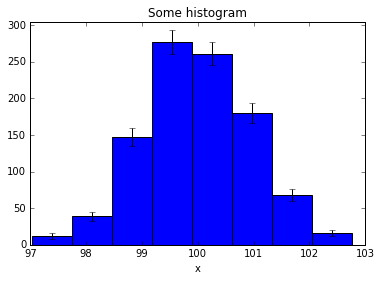

In [9]:
h1 = h2.projection("x")
h1.plot(errors=True)
h1

/home/pipek/code/physt/physt/histogram1d.py:291: UserWarning: Deprecation: use bin_sizes instead of bin_widths.
  warnings.warn("Deprecation: use bin_sizes instead of bin_widths.")


Histogram1D(bins=4, total=1000.0)

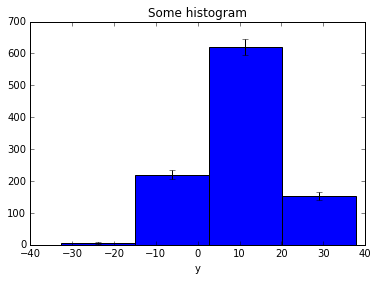

In [10]:
h1 = h2.projection("y")
h1.plot(errors=True)
h1

## N-dimensional histograms

In [11]:
data = [np.random.rand(1000)[:, np.newaxis] for i in range(4)]
data = np.concatenate(data, axis=1)
h5 = histogramdd(data, [3, 2, 2, 3], axis_names="abcd")
h5

HistogramND(bins=(3, 2, 2, 3), total=1000.0)

In [12]:
h5.frequencies

array([[[[ 30.,  26.,  24.],
         [ 32.,  29.,  21.]],

        [[ 28.,  23.,  31.],
         [ 28.,  22.,  20.]]],


       [[[ 32.,  28.,  25.],
         [ 28.,  30.,  28.]],

        [[ 25.,  21.,  21.],
         [ 31.,  29.,  28.]]],


       [[[ 16.,  40.,  38.],
         [ 27.,  32.,  27.]],

        [[ 31.,  27.,  34.],
         [ 27.,  28.,  33.]]]])

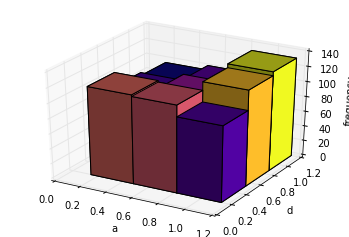

In [13]:
h5.projection("a", "d").plot();

/home/pipek/code/physt/physt/histogram1d.py:291: UserWarning: Deprecation: use bin_sizes instead of bin_widths.
  warnings.warn("Deprecation: use bin_sizes instead of bin_widths.")


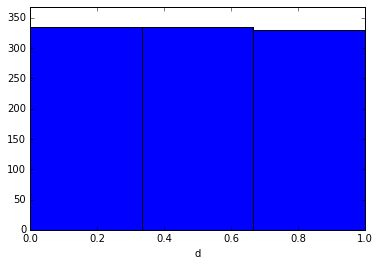

In [14]:
h5.projection("d").plot();

## Support for pandas DataFrames (without pandas dependency ;-))

In [15]:
# Load notorious example data set
iris = sns.load_dataset('iris')

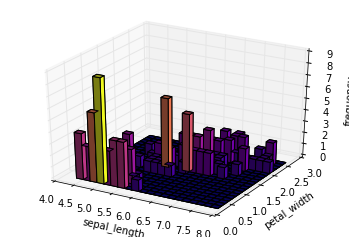

In [16]:
iris_hist = histogramdd(iris[["sepal_length", "petal_width"]], 20)
iris_hist.plot();

/home/pipek/code/physt/physt/histogram1d.py:291: UserWarning: Deprecation: use bin_sizes instead of bin_widths.
  warnings.warn("Deprecation: use bin_sizes instead of bin_widths.")


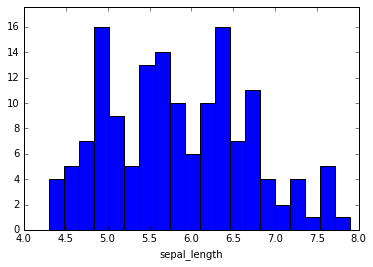

In [17]:
iris_hist.projection("sepal_length").plot();

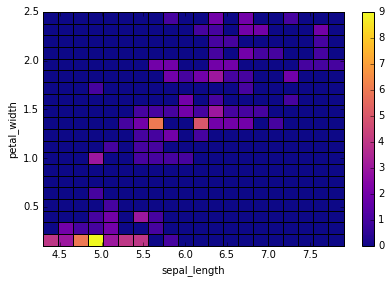

In [18]:
iris_hist.plot("map");